In [9]:
import pandas as pd
import numpy as np
from scipy.stats import trim_mean   # conda install scipy
from statsmodels import robust      # conda install -c conda-forge statsmodels 
import wquantiles                   # pip install wquantiles
import plotly.express as px

import seaborn as sns
import matplotlib.pylab as plt

In [10]:
#1. Lectura y manejo del CSV

In [12]:
df_city = pd.read_csv('/Users/anadeondarza/Desktop/ironhack_data/challenges/Diamon/Data/city.csv')
df_city

,city_id,city
0,0013c01fe0d094209b8bd3d23b8f96dbabcd01ddd2a039...,Amsterdam
1,1e73b1647343b286269d517e6f07e6e07ccef10cd7b785...,Zurich
2,2bd25cd960aba8b706e2b67f2bb38b750ee5384b0e9883...,Las Vegas
3,5a59ef2e40c5f89adb8c0c6ad0a8019b0e252fff530cf2...,New York City
4,5dd272b4f316b776a7b8e3d0894b37e1e42be3d5d3b204...,Paris
5,68371d5bdaab31b5cbc25fbf94b8f9c1238294fc50e715...,Tel Aviv
6,6c425048aa7badd9d84615bd8620ca1864efd81cfdb69d...,Dubai
7,89c7286890f7347ab235234e74d406596a127ae3679042...,Kimberly
8,ba04d229e496b8383a4df91f5e77c194a95cf1a069b0b2...,Surat
9,ca3aa21a5b70c3e88cc6336682c8c7da928a0c66a5ead4...,Antwerp


In [13]:
df_charity = pd.read_csv('/Users/anadeondarza/Desktop/ironhack_data/challenges/Diamon/Data/charity.csv')
df_charity

,clarity_id,clarity
0,03c358cbd92e83278fd523f58dc6a9b4b198d00728af65...,SI2
1,3f9db06236e9719b61c826b612b882fa702ec81574e44c...,VVS2
2,66686ae1f0c9c400ba32dc600a34ff0aa173395bcbc2d8...,VVS1
3,7020fd7aaf1656dea5c0c0c3d4bb5a28ebf6243fba95d3...,IF
4,bd4f4a250da88f87729febc739ae97f439a14f9d38f0e3...,SI1
5,c2818bc4e5ec4ae4a357a0df6fed73652e169ec676f7d4...,I1
6,ef736c1f91cd1900c3d9cde925b1bf4f013adc0211a9ee...,VS1
7,f0b2a1d0db08cc64f85d74f1d15c2191e0e49039f4d8f2...,VS2


In [14]:
df_color = pd.read_csv('/Users/anadeondarza/Desktop/ironhack_data/challenges/Diamon/Data/color.csv')
df_color

,color_id,color
0,333e0a1e27815d0ceee55c473fe3dc93d56c63e3bee2b3...,G
1,3f39d5c348e5b79d06e842c114e6cc571583bbf44e4b0e...,D
2,44bd7ae60f478fae1061e11a7739f4b94d1daf917982d3...,H
3,6da43b944e494e885e69af021f93c6d9331c78aa228084...,J
4,a83dd0ccbffe39d071cc317ddf6e97f5c6b1c87af91919...,I
5,a9f51566bd6705f7ea6ad54bb9deb449f795582d6529a0...,E
6,f67ab10ad4e4c53121b6a5fe4da9c10ddee905b978d378...,F


In [15]:
df_cut = pd.read_csv('/Users/anadeondarza/Desktop/ironhack_data/challenges/Diamon/Data/cut.csv')
df_cut

,cut_id,cut
0,388655e25e91872329272fc10128ef5354b3b19a05d7e8...,Very Good
1,4e3cfaa334cbafb57a399a98fad8d3812ece460018f457...,Ideal
2,c939327ca16dcf97ca32521d8b834bf1de16573d21deda...,Good
3,de88c121a82a06352bf1aaceba20578356408a334ba046...,Premium
4,f7b19afcde965ea4942b878d266f89f8ba9a5a833e60f7...,Fair


In [16]:
df_dimensions = pd.read_csv('/Users/anadeondarza/Desktop/ironhack_data/challenges/Diamon/Data/dimensions.csv')
df_dimensions 

,index_id,depth,table,x,y,z
0,5feceb66ffc86f38d952786c6d696c79c2dbc239dd4e91...,62.4,58.0,6.83,6.79,4.25
1,6b86b273ff34fce19d6b804eff5a3f5747ada4eaa22f1d...,63.0,57.0,4.35,4.38,2.75
2,d4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f...,65.5,55.0,5.62,5.53,3.65
3,4e07408562bedb8b60ce05c1decfe3ad16b72230967de0...,63.8,56.0,4.68,4.72,3.00
4,4b227777d4dd1fc61c6f884f48641d02b4d121d3fd328c...,60.5,59.0,6.55,6.51,3.95
...,...,...,...,...,...,...
40450,f0bc79169405ebeb24e308055156b946ffd819db9b4f75...,62.7,57.0,7.10,7.04,4.43
40451,339916a23bf22b052b54cb2a9b36ee8418c1c68b46acad...,57.1,60.0,8.31,8.25,4.73
40452,46957922b99954654c1deb8d854c3f069bf118b2ce9415...,62.7,56.0,6.37,6.42,4.01
40453,9d733392d362d5c6f1d9b9659b601c7d4b5a1c1c8df579...,61.9,54.3,4.45,4.47,2.76


In [17]:
df_properties = pd.read_csv('/Users/anadeondarza/Desktop/ironhack_data/challenges/Diamon/Data/properties.csv')
df_properties

,index_id,cut_id,color_id,clarity_id
0,5feceb66ffc86f38d952786c6d696c79c2dbc239dd4e91...,de88c121a82a06352bf1aaceba20578356408a334ba046...,6da43b944e494e885e69af021f93c6d9331c78aa228084...,f0b2a1d0db08cc64f85d74f1d15c2191e0e49039f4d8f2...
1,6b86b273ff34fce19d6b804eff5a3f5747ada4eaa22f1d...,388655e25e91872329272fc10128ef5354b3b19a05d7e8...,44bd7ae60f478fae1061e11a7739f4b94d1daf917982d3...,f0b2a1d0db08cc64f85d74f1d15c2191e0e49039f4d8f2...
2,d4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f...,f7b19afcde965ea4942b878d266f89f8ba9a5a833e60f7...,333e0a1e27815d0ceee55c473fe3dc93d56c63e3bee2b3...,ef736c1f91cd1900c3d9cde925b1bf4f013adc0211a9ee...
3,4e07408562bedb8b60ce05c1decfe3ad16b72230967de0...,c939327ca16dcf97ca32521d8b834bf1de16573d21deda...,3f39d5c348e5b79d06e842c114e6cc571583bbf44e4b0e...,bd4f4a250da88f87729febc739ae97f439a14f9d38f0e3...
4,4b227777d4dd1fc61c6f884f48641d02b4d121d3fd328c...,4e3cfaa334cbafb57a399a98fad8d3812ece460018f457...,333e0a1e27815d0ceee55c473fe3dc93d56c63e3bee2b3...,bd4f4a250da88f87729febc739ae97f439a14f9d38f0e3...
...,...,...,...,...
40450,f0bc79169405ebeb24e308055156b946ffd819db9b4f75...,4e3cfaa334cbafb57a399a98fad8d3812ece460018f457...,333e0a1e27815d0ceee55c473fe3dc93d56c63e3bee2b3...,ef736c1f91cd1900c3d9cde925b1bf4f013adc0211a9ee...
40451,339916a23bf22b052b54cb2a9b36ee8418c1c68b46acad...,c939327ca16dcf97ca32521d8b834bf1de16573d21deda...,f67ab10ad4e4c53121b6a5fe4da9c10ddee905b978d378...,03c358cbd92e83278fd523f58dc6a9b4b198d00728af65...
40452,46957922b99954654c1deb8d854c3f069bf118b2ce9415...,4e3cfaa334cbafb57a399a98fad8d3812ece460018f457...,44bd7ae60f478fae1061e11a7739f4b94d1daf917982d3...,bd4f4a250da88f87729febc739ae97f439a14f9d38f0e3...
40453,9d733392d362d5c6f1d9b9659b601c7d4b5a1c1c8df579...,4e3cfaa334cbafb57a399a98fad8d3812ece460018f457...,6da43b944e494e885e69af021f93c6d9331c78aa228084...,ef736c1f91cd1900c3d9cde925b1bf4f013adc0211a9ee...


In [18]:
df_transaction = pd.read_csv('/Users/anadeondarza/Desktop/ironhack_data/challenges/Diamon/Data/transaction.csv')
df_transaction

,index_id,price,city_id,carat
0,5feceb66ffc86f38d952786c6d696c79c2dbc239dd4e91...,4268,89c7286890f7347ab235234e74d406596a127ae3679042...,1.21
1,6b86b273ff34fce19d6b804eff5a3f5747ada4eaa22f1d...,505,ca3aa21a5b70c3e88cc6336682c8c7da928a0c66a5ead4...,0.32
2,d4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f...,2686,ecc0e7dc084f141b29479058967d0bc07dee25d9690a98...,0.71
3,4e07408562bedb8b60ce05c1decfe3ad16b72230967de0...,738,5a59ef2e40c5f89adb8c0c6ad0a8019b0e252fff530cf2...,0.41
4,4b227777d4dd1fc61c6f884f48641d02b4d121d3fd328c...,4882,6c425048aa7badd9d84615bd8620ca1864efd81cfdb69d...,1.02
...,...,...,...,...
40450,f0bc79169405ebeb24e308055156b946ffd819db9b4f75...,10070,5a59ef2e40c5f89adb8c0c6ad0a8019b0e252fff530cf2...,1.34
40451,339916a23bf22b052b54cb2a9b36ee8418c1c68b46acad...,12615,1e73b1647343b286269d517e6f07e6e07ccef10cd7b785...,2.02
40452,46957922b99954654c1deb8d854c3f069bf118b2ce9415...,5457,68371d5bdaab31b5cbc25fbf94b8f9c1238294fc50e715...,1.01
40453,9d733392d362d5c6f1d9b9659b601c7d4b5a1c1c8df579...,456,5dd272b4f316b776a7b8e3d0894b37e1e42be3d5d3b204...,0.33


In [19]:
merged_df = df_city.merge(df_transaction)
merged_df

,city_id,city,index_id,price,carat
0,0013c01fe0d094209b8bd3d23b8f96dbabcd01ddd2a039...,Amsterdam,5f9c4ab08cac7457e9111a30e4664920607ea2c115a143...,6216,1.00
1,0013c01fe0d094209b8bd3d23b8f96dbabcd01ddd2a039...,Amsterdam,624b60c58c9d8bfb6ff1886c2fd605d2adeb6ea4da5760...,4969,1.16
2,0013c01fe0d094209b8bd3d23b8f96dbabcd01ddd2a039...,Amsterdam,86e50149658661312a9e0b35558d84f6c6d3da797f552a...,2422,0.70
3,0013c01fe0d094209b8bd3d23b8f96dbabcd01ddd2a039...,Amsterdam,3d914f9348c9cc0ff8a79716700b9fcd4d2f3e71160800...,3861,1.04
4,0013c01fe0d094209b8bd3d23b8f96dbabcd01ddd2a039...,Amsterdam,8722616204217eddb39e7df969e0698aed8e599ba62ed2...,2440,0.78
...,...,...,...,...,...
40450,ed76f191621cf6ed77eab6a8013d1cb4bdfa89a75a24aa...,Luxembourg,6a4490713063ded3aad43f37c39037f1884a12813910ca...,7840,1.50
40451,ed76f191621cf6ed77eab6a8013d1cb4bdfa89a75a24aa...,Luxembourg,eb1bc92524487e990af750137fa20dab6ae30ebb315ecf...,1058,0.39
40452,ed76f191621cf6ed77eab6a8013d1cb4bdfa89a75a24aa...,Luxembourg,c6f09db9685f34691490390033c37b1bd7b13a7c6a4d48...,17392,2.02
40453,ed76f191621cf6ed77eab6a8013d1cb4bdfa89a75a24aa...,Luxembourg,78b20395c3a5ff8777fb523373d519e5fede4917f1b175...,1436,0.50


In [20]:
merged_df_1 = merged_df.merge(df_properties)
merged_df_1

,city_id,city,index_id,price,carat,cut_id,color_id,clarity_id
0,0013c01fe0d094209b8bd3d23b8f96dbabcd01ddd2a039...,Amsterdam,5f9c4ab08cac7457e9111a30e4664920607ea2c115a143...,6216,1.00,de88c121a82a06352bf1aaceba20578356408a334ba046...,333e0a1e27815d0ceee55c473fe3dc93d56c63e3bee2b3...,f0b2a1d0db08cc64f85d74f1d15c2191e0e49039f4d8f2...
1,0013c01fe0d094209b8bd3d23b8f96dbabcd01ddd2a039...,Amsterdam,624b60c58c9d8bfb6ff1886c2fd605d2adeb6ea4da5760...,4969,1.16,de88c121a82a06352bf1aaceba20578356408a334ba046...,333e0a1e27815d0ceee55c473fe3dc93d56c63e3bee2b3...,03c358cbd92e83278fd523f58dc6a9b4b198d00728af65...
2,0013c01fe0d094209b8bd3d23b8f96dbabcd01ddd2a039...,Amsterdam,86e50149658661312a9e0b35558d84f6c6d3da797f552a...,2422,0.70,388655e25e91872329272fc10128ef5354b3b19a05d7e8...,44bd7ae60f478fae1061e11a7739f4b94d1daf917982d3...,ef736c1f91cd1900c3d9cde925b1bf4f013adc0211a9ee...
3,0013c01fe0d094209b8bd3d23b8f96dbabcd01ddd2a039...,Amsterdam,3d914f9348c9cc0ff8a79716700b9fcd4d2f3e71160800...,3861,1.04,de88c121a82a06352bf1aaceba20578356408a334ba046...,333e0a1e27815d0ceee55c473fe3dc93d56c63e3bee2b3...,03c358cbd92e83278fd523f58dc6a9b4b198d00728af65...
4,0013c01fe0d094209b8bd3d23b8f96dbabcd01ddd2a039...,Amsterdam,8722616204217eddb39e7df969e0698aed8e599ba62ed2...,2440,0.78,c939327ca16dcf97ca32521d8b834bf1de16573d21deda...,44bd7ae60f478fae1061e11a7739f4b94d1daf917982d3...,f0b2a1d0db08cc64f85d74f1d15c2191e0e49039f4d8f2...
...,...,...,...,...,...,...,...,...
40450,ed76f191621cf6ed77eab6a8013d1cb4bdfa89a75a24aa...,Luxembourg,6a4490713063ded3aad43f37c39037f1884a12813910ca...,7840,1.50,388655e25e91872329272fc10128ef5354b3b19a05d7e8...,6da43b944e494e885e69af021f93c6d9331c78aa228084...,3f9db06236e9719b61c826b612b882fa702ec81574e44c...
40451,ed76f191621cf6ed77eab6a8013d1cb4bdfa89a75a24aa...,Luxembourg,eb1bc92524487e990af750137fa20dab6ae30ebb315ecf...,1058,0.39,c939327ca16dcf97ca32521d8b834bf1de16573d21deda...,f67ab10ad4e4c53121b6a5fe4da9c10ddee905b978d378...,3f9db06236e9719b61c826b612b882fa702ec81574e44c...
40452,ed76f191621cf6ed77eab6a8013d1cb4bdfa89a75a24aa...,Luxembourg,c6f09db9685f34691490390033c37b1bd7b13a7c6a4d48...,17392,2.02,4e3cfaa334cbafb57a399a98fad8d3812ece460018f457...,44bd7ae60f478fae1061e11a7739f4b94d1daf917982d3...,bd4f4a250da88f87729febc739ae97f439a14f9d38f0e3...
40453,ed76f191621cf6ed77eab6a8013d1cb4bdfa89a75a24aa...,Luxembourg,78b20395c3a5ff8777fb523373d519e5fede4917f1b175...,1436,0.50,de88c121a82a06352bf1aaceba20578356408a334ba046...,f67ab10ad4e4c53121b6a5fe4da9c10ddee905b978d378...,f0b2a1d0db08cc64f85d74f1d15c2191e0e49039f4d8f2...


In [21]:
merged_df_2 = merged_df_1.merge(df_charity)
merged_df_2

,city_id,city,index_id,price,carat,cut_id,color_id,clarity_id,clarity
0,0013c01fe0d094209b8bd3d23b8f96dbabcd01ddd2a039...,Amsterdam,5f9c4ab08cac7457e9111a30e4664920607ea2c115a143...,6216,1.00,de88c121a82a06352bf1aaceba20578356408a334ba046...,333e0a1e27815d0ceee55c473fe3dc93d56c63e3bee2b3...,f0b2a1d0db08cc64f85d74f1d15c2191e0e49039f4d8f2...,VS2
1,0013c01fe0d094209b8bd3d23b8f96dbabcd01ddd2a039...,Amsterdam,8722616204217eddb39e7df969e0698aed8e599ba62ed2...,2440,0.78,c939327ca16dcf97ca32521d8b834bf1de16573d21deda...,44bd7ae60f478fae1061e11a7739f4b94d1daf917982d3...,f0b2a1d0db08cc64f85d74f1d15c2191e0e49039f4d8f2...,VS2
2,0013c01fe0d094209b8bd3d23b8f96dbabcd01ddd2a039...,Amsterdam,d29d53701d3c859e29e1b90028eec1ca8e2f29439198b6...,14749,1.82,de88c121a82a06352bf1aaceba20578356408a334ba046...,44bd7ae60f478fae1061e11a7739f4b94d1daf917982d3...,f0b2a1d0db08cc64f85d74f1d15c2191e0e49039f4d8f2...,VS2
3,0013c01fe0d094209b8bd3d23b8f96dbabcd01ddd2a039...,Amsterdam,768b84ef05f655d57fe22d488451f075365f6cd18a1307...,5439,1.19,de88c121a82a06352bf1aaceba20578356408a334ba046...,a83dd0ccbffe39d071cc317ddf6e97f5c6b1c87af91919...,f0b2a1d0db08cc64f85d74f1d15c2191e0e49039f4d8f2...,VS2
4,0013c01fe0d094209b8bd3d23b8f96dbabcd01ddd2a039...,Amsterdam,a5abb1500bdeaef41e2edd598c015edfaa46793051b82d...,545,0.30,4e3cfaa334cbafb57a399a98fad8d3812ece460018f457...,333e0a1e27815d0ceee55c473fe3dc93d56c63e3bee2b3...,f0b2a1d0db08cc64f85d74f1d15c2191e0e49039f4d8f2...,VS2
...,...,...,...,...,...,...,...,...,...
40450,ed76f191621cf6ed77eab6a8013d1cb4bdfa89a75a24aa...,Luxembourg,cf1a6660c5cf9b5f74058a6958ad1f1a66027791fc21ec...,627,0.50,f7b19afcde965ea4942b878d266f89f8ba9a5a833e60f7...,f67ab10ad4e4c53121b6a5fe4da9c10ddee905b978d378...,c2818bc4e5ec4ae4a357a0df6fed73652e169ec676f7d4...,I1
40451,ed76f191621cf6ed77eab6a8013d1cb4bdfa89a75a24aa...,Luxembourg,b683515e95d1f265fe26abb458ca4e5fd32fba2024a8f1...,12587,3.50,4e3cfaa334cbafb57a399a98fad8d3812ece460018f457...,44bd7ae60f478fae1061e11a7739f4b94d1daf917982d3...,c2818bc4e5ec4ae4a357a0df6fed73652e169ec676f7d4...,I1
40452,ed76f191621cf6ed77eab6a8013d1cb4bdfa89a75a24aa...,Luxembourg,1ab3177f5ab151eae09890919526e5a614dc7a3a5f8f10...,491,0.40,c939327ca16dcf97ca32521d8b834bf1de16573d21deda...,f67ab10ad4e4c53121b6a5fe4da9c10ddee905b978d378...,c2818bc4e5ec4ae4a357a0df6fed73652e169ec676f7d4...,I1
40453,ed76f191621cf6ed77eab6a8013d1cb4bdfa89a75a24aa...,Luxembourg,b49eb4dc5969fb9d1d42b56df65adc324a5941e2b11bc3...,2387,1.02,de88c121a82a06352bf1aaceba20578356408a334ba046...,333e0a1e27815d0ceee55c473fe3dc93d56c63e3bee2b3...,c2818bc4e5ec4ae4a357a0df6fed73652e169ec676f7d4...,I1


In [22]:
merged_df_3 = merged_df_2.merge(df_color)
merged_df_3

,city_id,city,index_id,price,carat,cut_id,color_id,clarity_id,clarity,color
0,0013c01fe0d094209b8bd3d23b8f96dbabcd01ddd2a039...,Amsterdam,5f9c4ab08cac7457e9111a30e4664920607ea2c115a143...,6216,1.00,de88c121a82a06352bf1aaceba20578356408a334ba046...,333e0a1e27815d0ceee55c473fe3dc93d56c63e3bee2b3...,f0b2a1d0db08cc64f85d74f1d15c2191e0e49039f4d8f2...,VS2,G
1,0013c01fe0d094209b8bd3d23b8f96dbabcd01ddd2a039...,Amsterdam,a5abb1500bdeaef41e2edd598c015edfaa46793051b82d...,545,0.30,4e3cfaa334cbafb57a399a98fad8d3812ece460018f457...,333e0a1e27815d0ceee55c473fe3dc93d56c63e3bee2b3...,f0b2a1d0db08cc64f85d74f1d15c2191e0e49039f4d8f2...,VS2,G
2,0013c01fe0d094209b8bd3d23b8f96dbabcd01ddd2a039...,Amsterdam,7c3d90003d7d645be0b5f3782533c198a5d5dee0687042...,10302,1.46,4e3cfaa334cbafb57a399a98fad8d3812ece460018f457...,333e0a1e27815d0ceee55c473fe3dc93d56c63e3bee2b3...,f0b2a1d0db08cc64f85d74f1d15c2191e0e49039f4d8f2...,VS2,G
3,0013c01fe0d094209b8bd3d23b8f96dbabcd01ddd2a039...,Amsterdam,941b74661161da4ada37e53ac991b085d6700e9b16fb8d...,983,0.38,4e3cfaa334cbafb57a399a98fad8d3812ece460018f457...,333e0a1e27815d0ceee55c473fe3dc93d56c63e3bee2b3...,f0b2a1d0db08cc64f85d74f1d15c2191e0e49039f4d8f2...,VS2,G
4,0013c01fe0d094209b8bd3d23b8f96dbabcd01ddd2a039...,Amsterdam,c18a8ad752fb7e649161dcabed2d1fb96fa38265866c1e...,526,0.30,388655e25e91872329272fc10128ef5354b3b19a05d7e8...,333e0a1e27815d0ceee55c473fe3dc93d56c63e3bee2b3...,f0b2a1d0db08cc64f85d74f1d15c2191e0e49039f4d8f2...,VS2,G
...,...,...,...,...,...,...,...,...,...,...
40450,e9c722cbefc2f055ae60b4e2cbe73a2d99537eab0c37f3...,Madrid,d6024d73c1c0fcb028067f2c3cacfacb208a576d7169c1...,2291,1.01,388655e25e91872329272fc10128ef5354b3b19a05d7e8...,3f39d5c348e5b79d06e842c114e6cc571583bbf44e4b0e...,c2818bc4e5ec4ae4a357a0df6fed73652e169ec676f7d4...,I1,D
40451,e9c722cbefc2f055ae60b4e2cbe73a2d99537eab0c37f3...,Madrid,3a144cb5bcdd57e4429678a4ec2b7f0d70cccfd027f158...,413,0.34,4e3cfaa334cbafb57a399a98fad8d3812ece460018f457...,3f39d5c348e5b79d06e842c114e6cc571583bbf44e4b0e...,c2818bc4e5ec4ae4a357a0df6fed73652e169ec676f7d4...,I1,D
40452,ecc0e7dc084f141b29479058967d0bc07dee25d9690a98...,London,6df29737f57162f8e63de7d1888814d845c10634d3d28a...,2657,1.00,c939327ca16dcf97ca32521d8b834bf1de16573d21deda...,3f39d5c348e5b79d06e842c114e6cc571583bbf44e4b0e...,c2818bc4e5ec4ae4a357a0df6fed73652e169ec676f7d4...,I1,D
40453,ecc0e7dc084f141b29479058967d0bc07dee25d9690a98...,London,827d4e8faeb782a86c75ec77880539365d467102940ecb...,5979,1.51,c939327ca16dcf97ca32521d8b834bf1de16573d21deda...,3f39d5c348e5b79d06e842c114e6cc571583bbf44e4b0e...,c2818bc4e5ec4ae4a357a0df6fed73652e169ec676f7d4...,I1,D


In [23]:
merged_df_4 = merged_df_3.merge(df_cut)
merged_df_4

,city_id,city,index_id,price,carat,cut_id,color_id,clarity_id,clarity,color,cut
0,0013c01fe0d094209b8bd3d23b8f96dbabcd01ddd2a039...,Amsterdam,5f9c4ab08cac7457e9111a30e4664920607ea2c115a143...,6216,1.00,de88c121a82a06352bf1aaceba20578356408a334ba046...,333e0a1e27815d0ceee55c473fe3dc93d56c63e3bee2b3...,f0b2a1d0db08cc64f85d74f1d15c2191e0e49039f4d8f2...,VS2,G,Premium
1,0013c01fe0d094209b8bd3d23b8f96dbabcd01ddd2a039...,Amsterdam,e3e69eaf6c365e40a7a9fbb927273b3a7d8c2f5893e448...,675,0.30,de88c121a82a06352bf1aaceba20578356408a334ba046...,333e0a1e27815d0ceee55c473fe3dc93d56c63e3bee2b3...,f0b2a1d0db08cc64f85d74f1d15c2191e0e49039f4d8f2...,VS2,G,Premium
2,0013c01fe0d094209b8bd3d23b8f96dbabcd01ddd2a039...,Amsterdam,98f3aaa79f6ba1759e046f873955785d869eec78b60ff7...,1841,0.62,de88c121a82a06352bf1aaceba20578356408a334ba046...,333e0a1e27815d0ceee55c473fe3dc93d56c63e3bee2b3...,f0b2a1d0db08cc64f85d74f1d15c2191e0e49039f4d8f2...,VS2,G,Premium
3,0013c01fe0d094209b8bd3d23b8f96dbabcd01ddd2a039...,Amsterdam,c127fadbc2a29358f15bf318a1e8d74295d0f4d9801249...,720,0.32,de88c121a82a06352bf1aaceba20578356408a334ba046...,333e0a1e27815d0ceee55c473fe3dc93d56c63e3bee2b3...,f0b2a1d0db08cc64f85d74f1d15c2191e0e49039f4d8f2...,VS2,G,Premium
4,0013c01fe0d094209b8bd3d23b8f96dbabcd01ddd2a039...,Amsterdam,ffefca7dca30978a7c1eb93934c7d76a9712ac3a3f8cf4...,8874,1.39,de88c121a82a06352bf1aaceba20578356408a334ba046...,333e0a1e27815d0ceee55c473fe3dc93d56c63e3bee2b3...,f0b2a1d0db08cc64f85d74f1d15c2191e0e49039f4d8f2...,VS2,G,Premium
...,...,...,...,...,...,...,...,...,...,...,...
40450,ca3aa21a5b70c3e88cc6336682c8c7da928a0c66a5ead4...,Antwerp,6812ef15c2cca3c2b719df4e6d37c175bddc9064571ff1...,2211,0.47,f7b19afcde965ea4942b878d266f89f8ba9a5a833e60f7...,3f39d5c348e5b79d06e842c114e6cc571583bbf44e4b0e...,7020fd7aaf1656dea5c0c0c3d4bb5a28ebf6243fba95d3...,IF,D,Fair
40451,1e73b1647343b286269d517e6f07e6e07ccef10cd7b785...,Zurich,a4ee2024d3d75e44312be4c3d659bf9214159382db05e3...,5460,1.50,f7b19afcde965ea4942b878d266f89f8ba9a5a833e60f7...,3f39d5c348e5b79d06e842c114e6cc571583bbf44e4b0e...,c2818bc4e5ec4ae4a357a0df6fed73652e169ec676f7d4...,I1,D,Fair
40452,89c7286890f7347ab235234e74d406596a127ae3679042...,Kimberly,9800a8677d99e5f6968d7357e44006388b09d3b6a8676d...,2491,0.91,f7b19afcde965ea4942b878d266f89f8ba9a5a833e60f7...,3f39d5c348e5b79d06e842c114e6cc571583bbf44e4b0e...,c2818bc4e5ec4ae4a357a0df6fed73652e169ec676f7d4...,I1,D,Fair
40453,ba04d229e496b8383a4df91f5e77c194a95cf1a069b0b2...,Surat,83e86276134048f50522b4944d21f8a52004f7b138b58c...,15964,3.40,f7b19afcde965ea4942b878d266f89f8ba9a5a833e60f7...,3f39d5c348e5b79d06e842c114e6cc571583bbf44e4b0e...,c2818bc4e5ec4ae4a357a0df6fed73652e169ec676f7d4...,I1,D,Fair


In [24]:
merged_df_5 = merged_df_4.merge(df_dimensions)
merged_df_5

,city_id,city,index_id,price,carat,cut_id,color_id,clarity_id,clarity,color,cut,depth,table,x,y,z
0,0013c01fe0d094209b8bd3d23b8f96dbabcd01ddd2a039...,Amsterdam,5f9c4ab08cac7457e9111a30e4664920607ea2c115a143...,6216,1.00,de88c121a82a06352bf1aaceba20578356408a334ba046...,333e0a1e27815d0ceee55c473fe3dc93d56c63e3bee2b3...,f0b2a1d0db08cc64f85d74f1d15c2191e0e49039f4d8f2...,VS2,G,Premium,61.6,54.0,6.49,6.46,3.99
1,0013c01fe0d094209b8bd3d23b8f96dbabcd01ddd2a039...,Amsterdam,e3e69eaf6c365e40a7a9fbb927273b3a7d8c2f5893e448...,675,0.30,de88c121a82a06352bf1aaceba20578356408a334ba046...,333e0a1e27815d0ceee55c473fe3dc93d56c63e3bee2b3...,f0b2a1d0db08cc64f85d74f1d15c2191e0e49039f4d8f2...,VS2,G,Premium,60.6,60.0,4.34,4.30,2.62
2,0013c01fe0d094209b8bd3d23b8f96dbabcd01ddd2a039...,Amsterdam,98f3aaa79f6ba1759e046f873955785d869eec78b60ff7...,1841,0.62,de88c121a82a06352bf1aaceba20578356408a334ba046...,333e0a1e27815d0ceee55c473fe3dc93d56c63e3bee2b3...,f0b2a1d0db08cc64f85d74f1d15c2191e0e49039f4d8f2...,VS2,G,Premium,61.1,59.0,5.56,5.50,3.38
3,0013c01fe0d094209b8bd3d23b8f96dbabcd01ddd2a039...,Amsterdam,c127fadbc2a29358f15bf318a1e8d74295d0f4d9801249...,720,0.32,de88c121a82a06352bf1aaceba20578356408a334ba046...,333e0a1e27815d0ceee55c473fe3dc93d56c63e3bee2b3...,f0b2a1d0db08cc64f85d74f1d15c2191e0e49039f4d8f2...,VS2,G,Premium,60.2,57.0,4.45,4.42,2.67
4,0013c01fe0d094209b8bd3d23b8f96dbabcd01ddd2a039...,Amsterdam,ffefca7dca30978a7c1eb93934c7d76a9712ac3a3f8cf4...,8874,1.39,de88c121a82a06352bf1aaceba20578356408a334ba046...,333e0a1e27815d0ceee55c473fe3dc93d56c63e3bee2b3...,f0b2a1d0db08cc64f85d74f1d15c2191e0e49039f4d8f2...,VS2,G,Premium,62.0,56.0,7.18,7.14,4.44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40450,ca3aa21a5b70c3e88cc6336682c8c7da928a0c66a5ead4...,Antwerp,6812ef15c2cca3c2b719df4e6d37c175bddc9064571ff1...,2211,0.47,f7b19afcde965ea4942b878d266f89f8ba9a5a833e60f7...,3f39d5c348e5b79d06e842c114e6cc571583bbf44e4b0e...,7020fd7aaf1656dea5c0c0c3d4bb5a28ebf6243fba95d3...,IF,D,Fair,60.6,60.0,5.09,4.98,3.05
40451,1e73b1647343b286269d517e6f07e6e07ccef10cd7b785...,Zurich,a4ee2024d3d75e44312be4c3d659bf9214159382db05e3...,5460,1.50,f7b19afcde965ea4942b878d266f89f8ba9a5a833e60f7...,3f39d5c348e5b79d06e842c114e6cc571583bbf44e4b0e...,c2818bc4e5ec4ae4a357a0df6fed73652e169ec676f7d4...,I1,D,Fair,64.7,62.0,7.19,7.04,4.60
40452,89c7286890f7347ab235234e74d406596a127ae3679042...,Kimberly,9800a8677d99e5f6968d7357e44006388b09d3b6a8676d...,2491,0.91,f7b19afcde965ea4942b878d266f89f8ba9a5a833e60f7...,3f39d5c348e5b79d06e842c114e6cc571583bbf44e4b0e...,c2818bc4e5ec4ae4a357a0df6fed73652e169ec676f7d4...,I1,D,Fair,66.2,57.0,6.00,5.94,3.95
40453,ba04d229e496b8383a4df91f5e77c194a95cf1a069b0b2...,Surat,83e86276134048f50522b4944d21f8a52004f7b138b58c...,15964,3.40,f7b19afcde965ea4942b878d266f89f8ba9a5a833e60f7...,3f39d5c348e5b79d06e842c114e6cc571583bbf44e4b0e...,c2818bc4e5ec4ae4a357a0df6fed73652e169ec676f7d4...,I1,D,Fair,66.8,52.0,9.42,9.34,6.27


In [25]:
df_final = merged_df_5.drop(['city_id','index_id','cut_id','color_id', 'clarity_id'], axis = 1)
df_final

,city,price,carat,clarity,color,cut,depth,table,x,y,z
0,Amsterdam,6216,1.00,VS2,G,Premium,61.6,54.0,6.49,6.46,3.99
1,Amsterdam,675,0.30,VS2,G,Premium,60.6,60.0,4.34,4.30,2.62
2,Amsterdam,1841,0.62,VS2,G,Premium,61.1,59.0,5.56,5.50,3.38
3,Amsterdam,720,0.32,VS2,G,Premium,60.2,57.0,4.45,4.42,2.67
4,Amsterdam,8874,1.39,VS2,G,Premium,62.0,56.0,7.18,7.14,4.44
...,...,...,...,...,...,...,...,...,...,...,...
40450,Antwerp,2211,0.47,IF,D,Fair,60.6,60.0,5.09,4.98,3.05
40451,Zurich,5460,1.50,I1,D,Fair,64.7,62.0,7.19,7.04,4.60
40452,Kimberly,2491,0.91,I1,D,Fair,66.2,57.0,6.00,5.94,3.95
40453,Surat,15964,3.40,I1,D,Fair,66.8,52.0,9.42,9.34,6.27


In [26]:
df_final.describe()

,price,carat,depth,table,x,y,z
count,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000
mean,3928.444469,0.797706,61.752841,57.446133,5.729392,5.732819,3.537154
std,3992.416147,0.475544,1.431725,2.233535,1.124453,1.146650,0.697062
min,326.000000,0.200000,43.000000,43.000000,0.000000,0.000000,0.000000
25%,945.000000,0.400000,61.000000,56.000000,4.710000,4.720000,2.910000
50%,2397.000000,0.700000,61.800000,57.000000,5.690000,5.710000,3.520000
75%,5331.000000,1.040000,62.500000,59.000000,6.540000,6.540000,4.035000
max,18823.000000,4.500000,79.000000,95.000000,10.230000,58.900000,8.060000


# Análisis precio, feature principal

In [30]:
per_75 = df_final['price'].quantile(0.75)
per_25 = df_final['price'].quantile(0.25)
per_50 = df_final['price'].quantile(0.50) 

print('Percentile 75th:', per_75, '\nPercentile 25th:', per_25, '\nPercentile 50th:', per_50)


Percentile 75th: 5331.0 
Percentile 25th: 945.0 
Percentile 50th: 2397.0


In [31]:
percentages = [0.05, 0.25, 0.5, 0.75, 0.95]
percentiles = df_final['price'].quantile(percentages)
percentiles
percentiles.index = [f'{p * 100}%' for p in percentages]
percentiles.transpose()

5.0%       544.0
25.0%      945.0
50.0%     2397.0
75.0%     5331.0
95.0%    13132.0
Name: price, dtype: float64

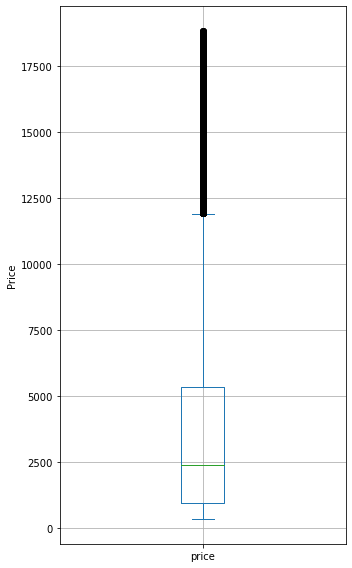

In [32]:
data = df_final['price'] 
ax = data.plot.box(figsize=(5, 8))
ax.set_ylabel('Price')
plt.tight_layout()
plt.grid()
plt.show()

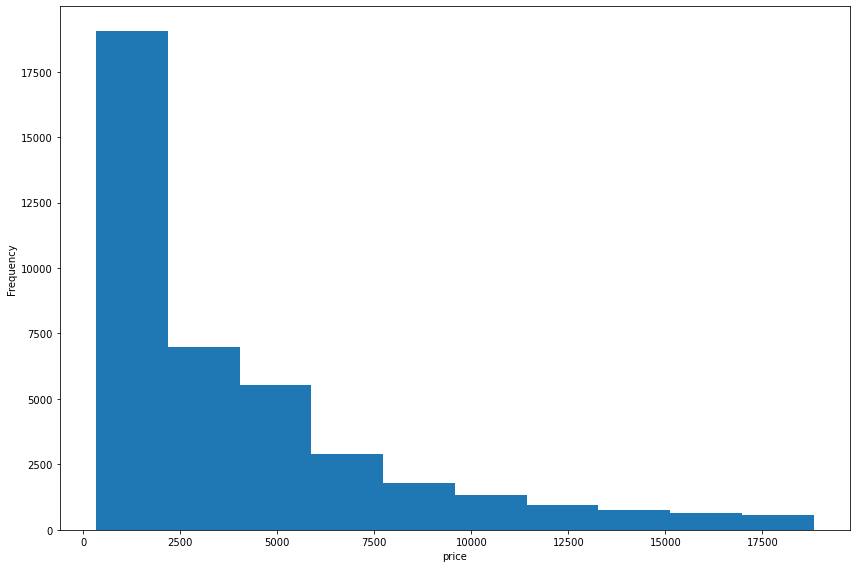

In [33]:
data = df_final['price']
ax = data.plot.hist(figsize=(12, 8))
ax.set_xlabel('price')
#ax.set_xlabel('Murder Rate (per 100,000)')
plt.tight_layout()

In [ ]:
# 2. Pasamos las features descriptivas a número para poder analizarlas en conjunto.

In [27]:
color_ = {'D':1,'H':2, 'J':3, 'I':4, 'E':5, 'F':6, 'G':7}
df_final['color'] = df_final['color'].map(color_)
df_final

,city,price,carat,clarity,color,cut,depth,table,x,y,z
0,Amsterdam,6216,1.00,VS2,7,Premium,61.6,54.0,6.49,6.46,3.99
1,Amsterdam,675,0.30,VS2,7,Premium,60.6,60.0,4.34,4.30,2.62
2,Amsterdam,1841,0.62,VS2,7,Premium,61.1,59.0,5.56,5.50,3.38
3,Amsterdam,720,0.32,VS2,7,Premium,60.2,57.0,4.45,4.42,2.67
4,Amsterdam,8874,1.39,VS2,7,Premium,62.0,56.0,7.18,7.14,4.44
...,...,...,...,...,...,...,...,...,...,...,...
40450,Antwerp,2211,0.47,IF,1,Fair,60.6,60.0,5.09,4.98,3.05
40451,Zurich,5460,1.50,I1,1,Fair,64.7,62.0,7.19,7.04,4.60
40452,Kimberly,2491,0.91,I1,1,Fair,66.2,57.0,6.00,5.94,3.95
40453,Surat,15964,3.40,I1,1,Fair,66.8,52.0,9.42,9.34,6.27


In [28]:
city_ = {'Amsterdam':1,'Zurich':2, 'Las Vegas':3, 'New York City':4, 'Paris':5, 'Tel Aviv':6, 'Dubai':7, 'Kimberly':8, 'Surat':9,'Antwerp':10, 'Madrid':11, 'London':12, 'Luxembourg':13}
df_final['city'] = df_final['city'].map(city_)
df_final


,city,price,carat,clarity,color,cut,depth,table,x,y,z
0,1,6216,1.00,VS2,7,Premium,61.6,54.0,6.49,6.46,3.99
1,1,675,0.30,VS2,7,Premium,60.6,60.0,4.34,4.30,2.62
2,1,1841,0.62,VS2,7,Premium,61.1,59.0,5.56,5.50,3.38
3,1,720,0.32,VS2,7,Premium,60.2,57.0,4.45,4.42,2.67
4,1,8874,1.39,VS2,7,Premium,62.0,56.0,7.18,7.14,4.44
...,...,...,...,...,...,...,...,...,...,...,...
40450,10,2211,0.47,IF,1,Fair,60.6,60.0,5.09,4.98,3.05
40451,2,5460,1.50,I1,1,Fair,64.7,62.0,7.19,7.04,4.60
40452,8,2491,0.91,I1,1,Fair,66.2,57.0,6.00,5.94,3.95
40453,9,15964,3.40,I1,1,Fair,66.8,52.0,9.42,9.34,6.27


In [29]:
cut_ = {'Very Good':1,'Ideal':2, 'Good':3, 'Premium':4, 'Fair':5}
df_final['cut'] = df_final['cut'].map(cut_)
df_final


,city,price,carat,clarity,color,cut,depth,table,x,y,z
0,1,6216,1.00,VS2,7,4,61.6,54.0,6.49,6.46,3.99
1,1,675,0.30,VS2,7,4,60.6,60.0,4.34,4.30,2.62
2,1,1841,0.62,VS2,7,4,61.1,59.0,5.56,5.50,3.38
3,1,720,0.32,VS2,7,4,60.2,57.0,4.45,4.42,2.67
4,1,8874,1.39,VS2,7,4,62.0,56.0,7.18,7.14,4.44
...,...,...,...,...,...,...,...,...,...,...,...
40450,10,2211,0.47,IF,1,5,60.6,60.0,5.09,4.98,3.05
40451,2,5460,1.50,I1,1,5,64.7,62.0,7.19,7.04,4.60
40452,8,2491,0.91,I1,1,5,66.2,57.0,6.00,5.94,3.95
40453,9,15964,3.40,I1,1,5,66.8,52.0,9.42,9.34,6.27


In [19]:
clarity_ = {'SI2':1,'VVS2':2, 'VVS1':3, 'IF':4, 'SI1':5, 'I1':6, 'VS1':7, 'VS2':8 }
df_final['clarity'] = df_final['clarity'].map(clarity_)
df_final

,city,price,carat,clarity,color,cut,depth,table,x,y,z
0,1,6216,1.00,8,7,4,61.6,54.0,6.49,6.46,3.99
1,1,675,0.30,8,7,4,60.6,60.0,4.34,4.30,2.62
2,1,1841,0.62,8,7,4,61.1,59.0,5.56,5.50,3.38
3,1,720,0.32,8,7,4,60.2,57.0,4.45,4.42,2.67
4,1,8874,1.39,8,7,4,62.0,56.0,7.18,7.14,4.44
...,...,...,...,...,...,...,...,...,...,...,...
40450,10,2211,0.47,4,1,5,60.6,60.0,5.09,4.98,3.05
40451,2,5460,1.50,6,1,5,64.7,62.0,7.19,7.04,4.60
40452,8,2491,0.91,6,1,5,66.2,57.0,6.00,5.94,3.95
40453,9,15964,3.40,6,1,5,66.8,52.0,9.42,9.34,6.27


In [ ]:
#3. Creamos una nueva feature, Volumen, para analizar el tamaño a través de una única feature

In [35]:
df_final["Volumen"] = df_final['x']*df_final['y']*df_final['z']
df_final

,city,price,carat,clarity,color,cut,depth,table,x,y,z,Volumen
0,1,6216,1.00,VS2,7,4,61.6,54.0,6.49,6.46,3.99,167.282346
1,1,675,0.30,VS2,7,4,60.6,60.0,4.34,4.30,2.62,48.894440
2,1,1841,0.62,VS2,7,4,61.1,59.0,5.56,5.50,3.38,103.360400
3,1,720,0.32,VS2,7,4,60.2,57.0,4.45,4.42,2.67,52.516230
4,1,8874,1.39,VS2,7,4,62.0,56.0,7.18,7.14,4.44,227.617488
...,...,...,...,...,...,...,...,...,...,...,...,...
40450,10,2211,0.47,IF,1,5,60.6,60.0,5.09,4.98,3.05,77.312010
40451,2,5460,1.50,I1,1,5,64.7,62.0,7.19,7.04,4.60,232.840960
40452,8,2491,0.91,I1,1,5,66.2,57.0,6.00,5.94,3.95,140.778000
40453,9,15964,3.40,I1,1,5,66.8,52.0,9.42,9.34,6.27,551.652156


In [ ]:
#4. Cremos un Heat Map par ver la relación entre las variables.

In [21]:
df_final.corr()

,city,price,carat,clarity,color,cut,depth,table,x,y,z,Volumen
city,1.000000,-0.002486,-0.002053,0.000568,-0.000025,-0.000026,-0.007344,-0.005196,-0.001035,-0.000351,-0.001662,-0.000401
price,-0.002486,1.000000,0.921935,-0.042485,-0.015515,0.078037,-0.014864,0.130111,0.885848,0.866163,0.874500,0.898684
carat,-0.002053,0.921935,1.000000,-0.104099,-0.063806,0.132828,0.026528,0.183392,0.975688,0.951667,0.967570,0.971851
clarity,0.000568,-0.042485,-0.104099,1.000000,-0.003632,-0.004224,0.001830,-0.028734,-0.096276,-0.095557,-0.094848,-0.102050
color,-0.000025,-0.015515,-0.063806,-0.003632,1.000000,-0.009608,-0.019692,-0.023688,-0.055105,-0.053675,-0.056586,-0.062691
cut,-0.000026,0.078037,0.132828,-0.004224,-0.009608,1.000000,0.000669,0.301053,0.136268,0.113712,0.124121,0.123847
depth,-0.007344,-0.014864,0.026528,0.001830,-0.019692,0.000669,1.000000,-0.293114,-0.026348,-0.030966,0.094655,0.006721
table,-0.005196,0.130111,0.183392,-0.028734,-0.023688,0.301053,-0.293114,1.000000,0.196059,0.184673,0.155189,0.168437
x,-0.001035,0.885848,0.975688,-0.096276,-0.055105,0.136268,-0.026348,0.196059,1.000000,0.973712,0.984876,0.952303
y,-0.000351,0.866163,0.951667,-0.095557,-0.053675,0.113712,-0.030966,0.184673,0.973712,1.000000,0.964828,0.977860


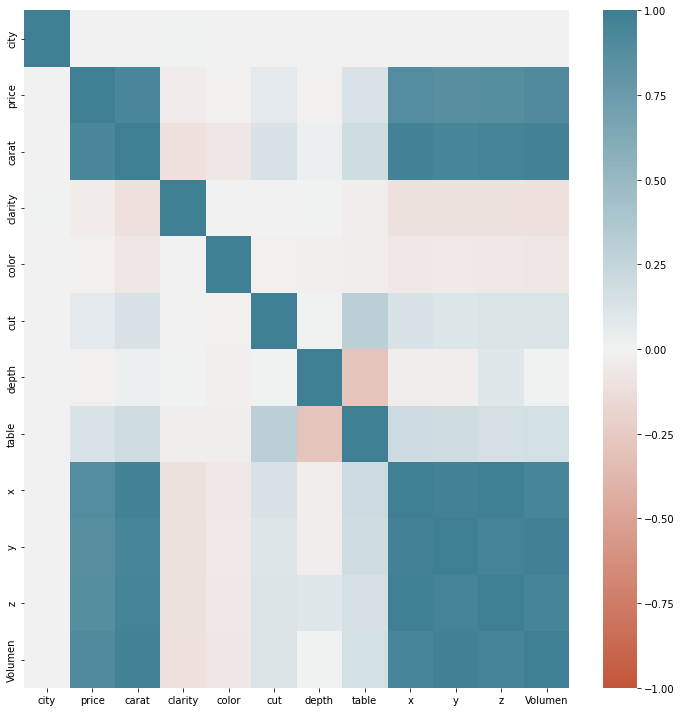

In [22]:
fig, ax = plt.subplots(figsize=(10, 10))
ax = sns.heatmap(df_final.corr(),
                 vmin=-1,
                 vmax=1,
                 cmap=sns.diverging_palette(20, 220, as_cmap=True),
                 # https://seaborn.pydata.org/generated/seaborn.diverging_palette.html
                 ax=ax)
plt.tight_layout()

In [ ]:
# Vemos que la variable que más incluye es el CARAT

# Carat

In [33]:
#outlayer
maxs = df_final["carat"].max()
maxs

4.5

In [34]:
filtered_df_1 = df_final.query('carat == 4.5')
print(filtered_df_1)

        city  price  carat clarity color   cut  depth  table      x      y  \
40321  Surat  18531    4.5      I1     J  Fair   65.8   58.0  10.23  10.16   

          z     Volumen  
40321  6.72  698.455296  


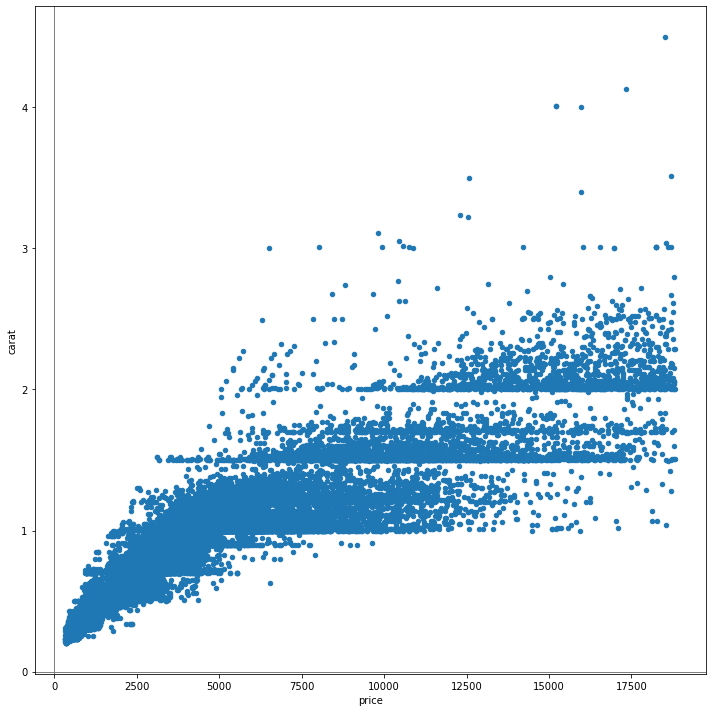

In [32]:
ax = df_final.plot.scatter(x='price',
                          y='carat',
                          figsize=(10, 10),
                          alpha=1)
ax.set_xlabel('price')
ax.set_ylabel('carat')
ax.axhline(0, color='grey', lw=1)
ax.axvline(0, color='grey', lw=1)

plt.tight_layout()

In [33]:
mean_carat = df_final['carat'].mean()
mean_carat

0.7977055988134839

In [34]:
median_carat = df_final['carat'].median()
median_carat

0.7

In [35]:
max_carat = df_final['carat'].max()
max_carat

4.5

In [36]:
min_carat = df_final['carat'].min()
min_carat

0.2

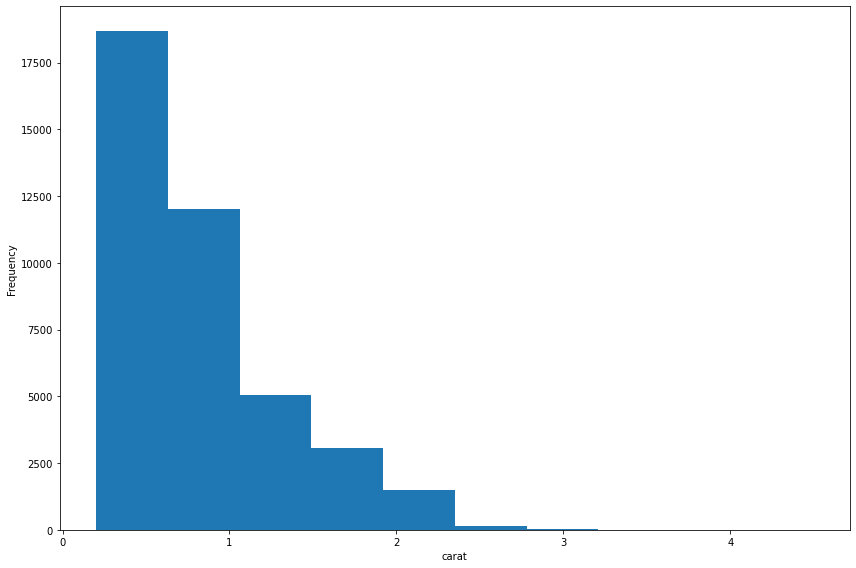

In [37]:
data_2 = df_final['carat']
ax = data_2.plot.hist(figsize=(12, 8))
ax.set_xlabel('carat')
#ax.set_xlabel('Murder Rate (per 100,000)')
plt.tight_layout()

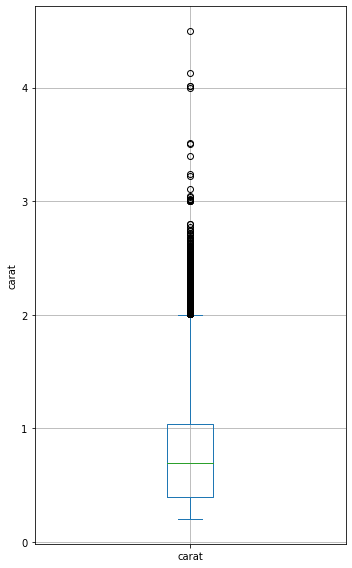

In [38]:
data = df_final['carat'] 
ax = data.plot.box(figsize=(5, 8))
ax.set_ylabel('carat')
plt.tight_layout()
plt.grid()
plt.show()

In [ ]:
# Al ser el volumen y el carat las variables que más afectan, analizamos la relación entre ambas.

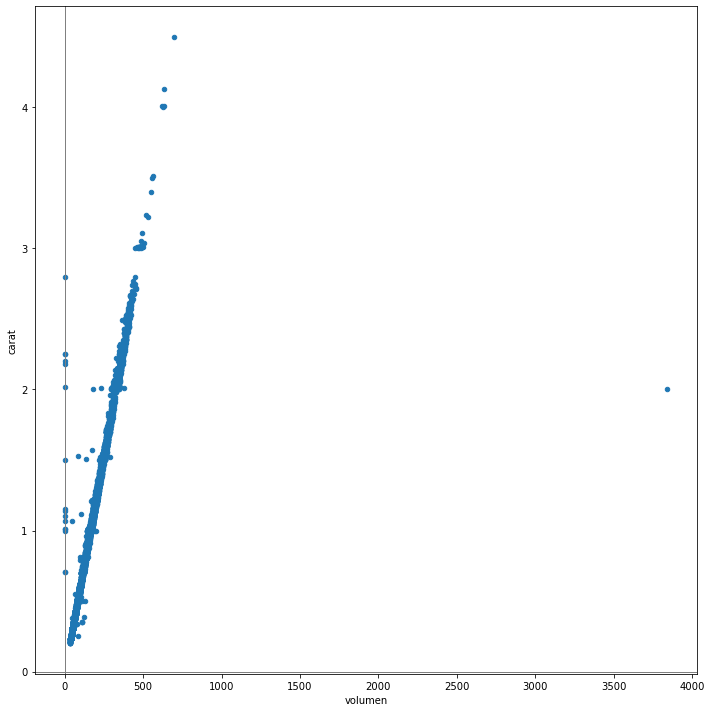

In [39]:
ax = df_final.plot.scatter(x='Volumen',
                          y='carat',
                          figsize=(10, 10),
                          alpha=1)
ax.set_xlabel('volumen')
ax.set_ylabel('carat')
ax.axhline(0, color='grey', lw=1)
ax.axvline(0, color='grey', lw=1)

plt.tight_layout()

# Volumen

In [28]:
#outlayer
maxs = df_final["Volumen"].max()
maxs

3840.5980600000003

In [36]:
#outlayer
mins = df_final["Volumen"].min()
mins

0.0

In [37]:
filtered_df_1 = df_final.query('Volumen == 0.0')
print(filtered_df_1)

       city  price  carat clarity  color  cut  depth  table     x     y    z  \
587       2   3142   1.00     SI2      7    4   59.1   59.0  6.55  6.48  0.0   
709       7   3696   1.10     SI2      7    4   63.0   59.0  6.50  6.47  0.0   
2393      8  18207   2.02     VS2      2    4   62.7   53.0  8.02  7.95  0.0   
2623      1  18034   2.25     SI2      2    4   62.8   59.0  0.00  0.00  0.0   
2661      3  12631   2.18     SI2      2    4   59.4   61.0  8.49  8.45  0.0   
3534      9  17265   2.20     SI1      2    4   61.2   59.0  8.42  8.37  0.0   
3959      8   3167   1.01      I1      2    4   58.1   59.0  6.66  6.60  0.0   
4809     10  15397   2.25     SI1      4    4   61.3   58.0  8.52  8.42  0.0   
7283      3   3837   1.01     SI2      6    4   59.2   58.0  6.50  6.47  0.0   
10858    11   5564   1.15     VS2      7    2   59.2   56.0  6.88  6.83  0.0   
21385     1   4954   1.07     SI2      6    2   61.6   56.0  0.00  6.62  0.0   
35754     5  18788   2.80     SI2      7

In [ ]:
#tenemos diamantes con volumen 0 debido a Z, es decir, deben ser diamantes totalmente planos. 

In [31]:
filtered_df = df_final.query('Volumen == 3840.5980600000003')
print(filtered_df)

         city  price  carat clarity color      cut  depth  table     x     y  \
2883  Antwerp  12210    2.0     SI2     H  Premium   58.9   57.0  8.09  58.9   

         z     Volumen  
2883  8.06  3840.59806  


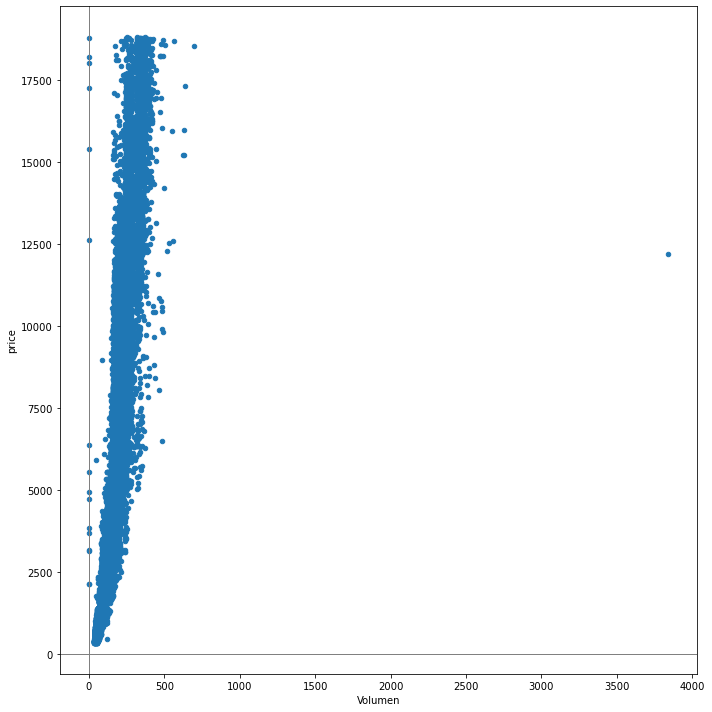

In [40]:
ax = df_final.plot.scatter(x='Volumen',
                          y='price',
                          figsize=(10, 10),
                          alpha=1)
ax.set_xlabel('Volumen')
ax.set_ylabel('price')
ax.axhline(0, color='grey', lw=1)
ax.axvline(0, color='grey', lw=1)

plt.tight_layout()

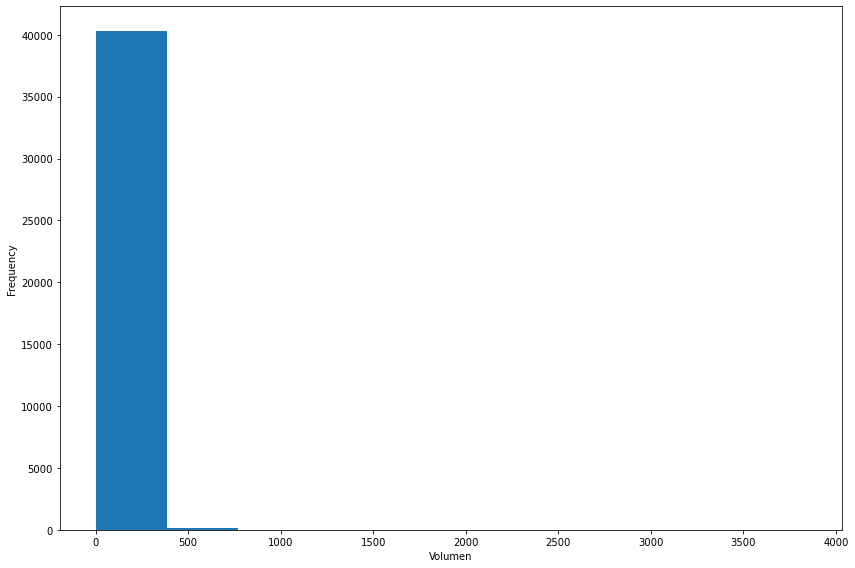

In [45]:
data_3 = df_final['Volumen']
ax = data_3.plot.hist(figsize=(12, 8))
ax.set_xlabel('Volumen')
#ax.set_xlabel('Murder Rate (per 100,000)')
plt.tight_layout()

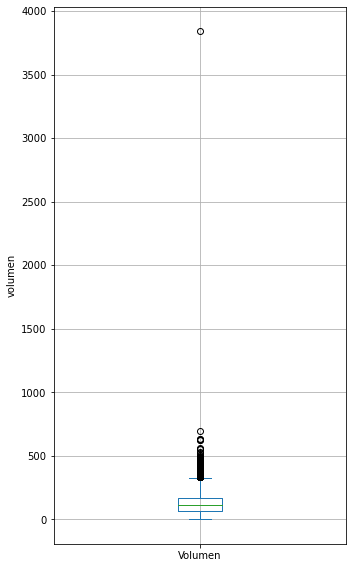

In [46]:
data = df_final['Volumen'] 
ax = data.plot.box(figsize=(5, 8))
ax.set_ylabel('volumen')
plt.tight_layout()
plt.grid()
plt.show()

# X,Y,Z

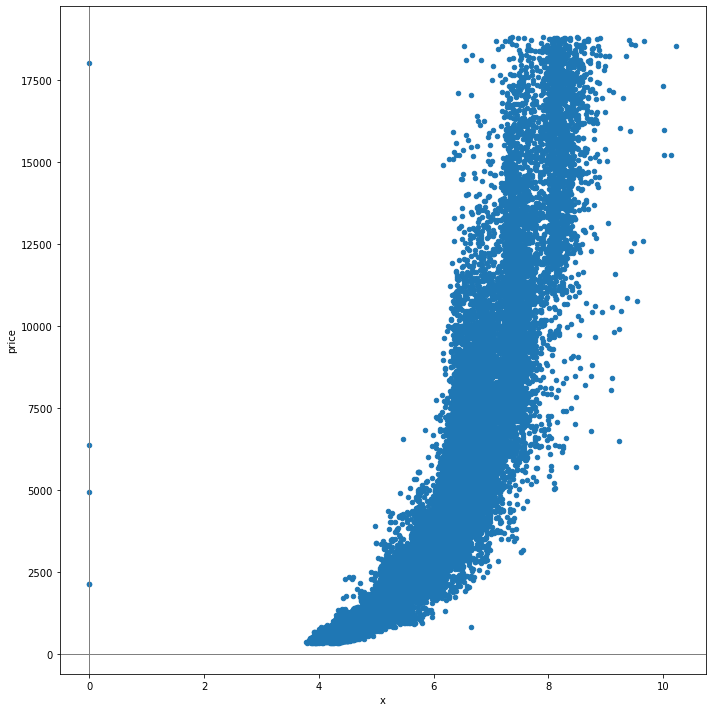

In [48]:
ax = df_final.plot.scatter(x='x',
                          y='price',
                          figsize=(10, 10),
                          alpha=1)
ax.set_xlabel('x')
ax.set_ylabel('price')
ax.axhline(0, color='grey', lw=1)
ax.axvline(0, color='grey', lw=1)

plt.tight_layout()

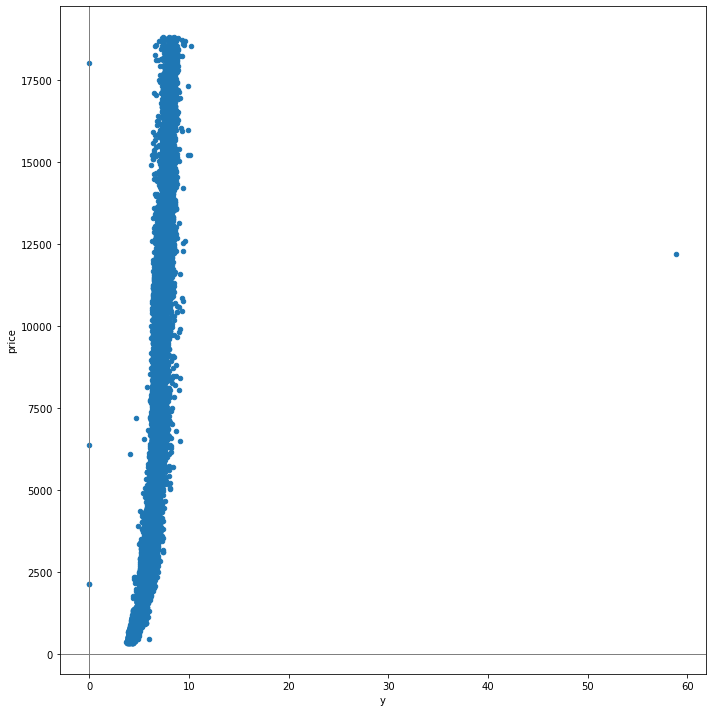

In [49]:
ax = df_final.plot.scatter(x='y',
                          y='price',
                          figsize=(10, 10),
                          alpha=1)
ax.set_xlabel('y')
ax.set_ylabel('price')
ax.axhline(0, color='grey', lw=1)
ax.axvline(0, color='grey', lw=1)

plt.tight_layout()

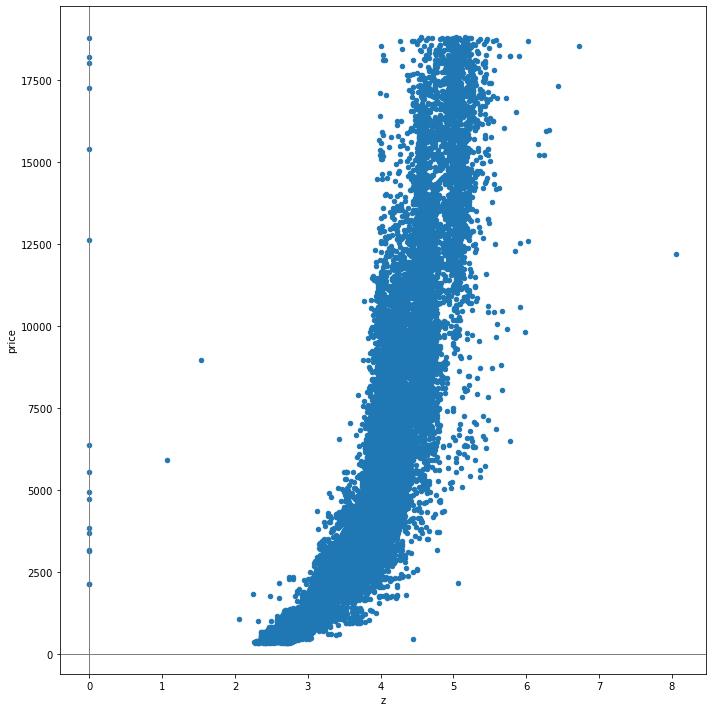

In [50]:
ax = df_final.plot.scatter(x='z',
                          y='price',
                          figsize=(10, 10),
                          alpha=1)
ax.set_xlabel('z')
ax.set_ylabel('price')
ax.axhline(0, color='grey', lw=1)
ax.axvline(0, color='grey', lw=1)

plt.tight_layout()

# Features con menos peso en el precio

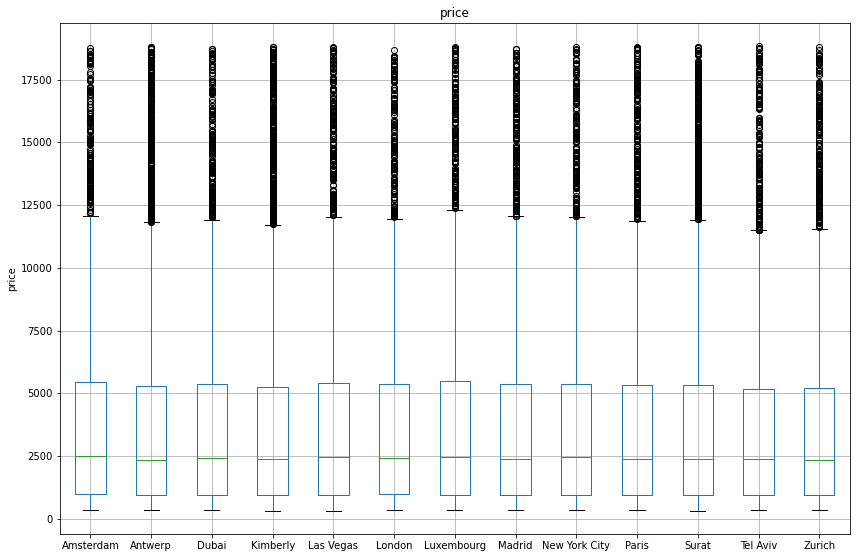

In [38]:
ax = df_final.boxplot(by='city',
                           column='price',
                           figsize=(12, 8))
ax.set_xlabel('')
ax.set_ylabel('price')
plt.suptitle('')
plt.tight_layout()

<AxesSubplot:ylabel='city'>

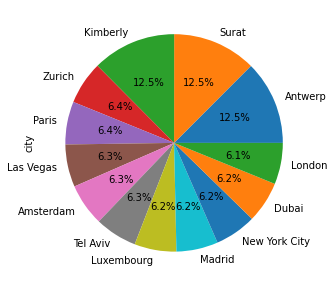

In [54]:
df_city = df_final.city.value_counts()
df_city.plot.pie(autopct='%1.1f%%',figsize=(5, 5))

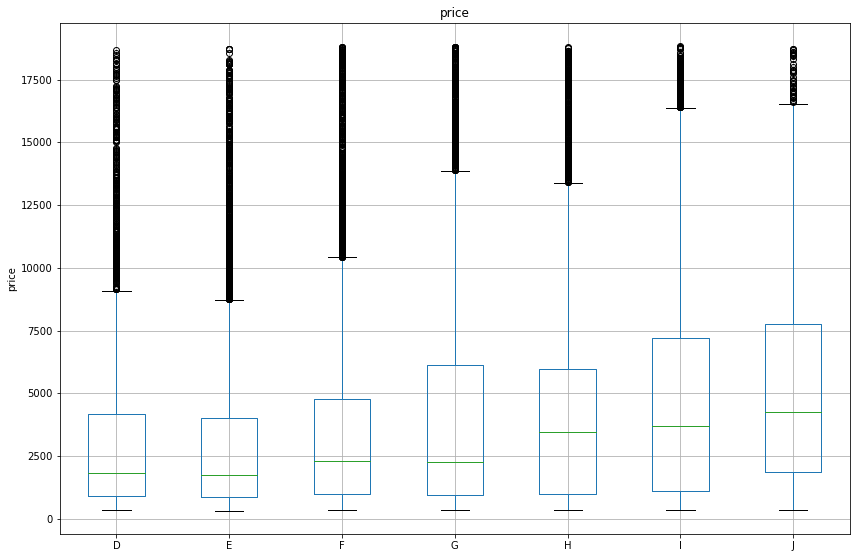

In [39]:
ax = df_final.boxplot(by='color',
                           column='price',
                           figsize=(12, 8))
ax.set_xlabel('')
ax.set_ylabel('price')
plt.suptitle('')
plt.tight_layout()

<AxesSubplot:ylabel='color'>

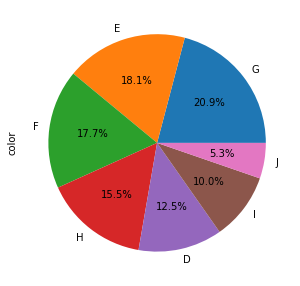

In [55]:
df_color = df_final.color.value_counts()
df_color.plot.pie(autopct='%1.1f%%',figsize=(5, 5))

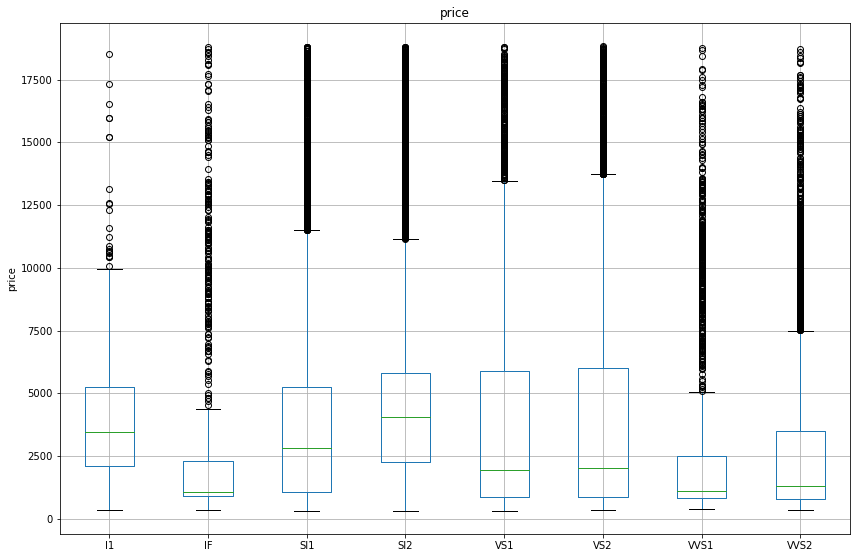

In [40]:
ax = df_final.boxplot(by='clarity',
                           column='price',
                           figsize=(12, 8))
ax.set_xlabel('')
ax.set_ylabel('price')
plt.suptitle('')
plt.tight_layout()

<AxesSubplot:ylabel='clarity'>

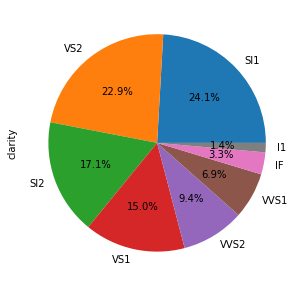

In [56]:
df_clarity = df_final.clarity.value_counts()
df_clarity.plot.pie(autopct='%1.1f%%',figsize=(5, 5))

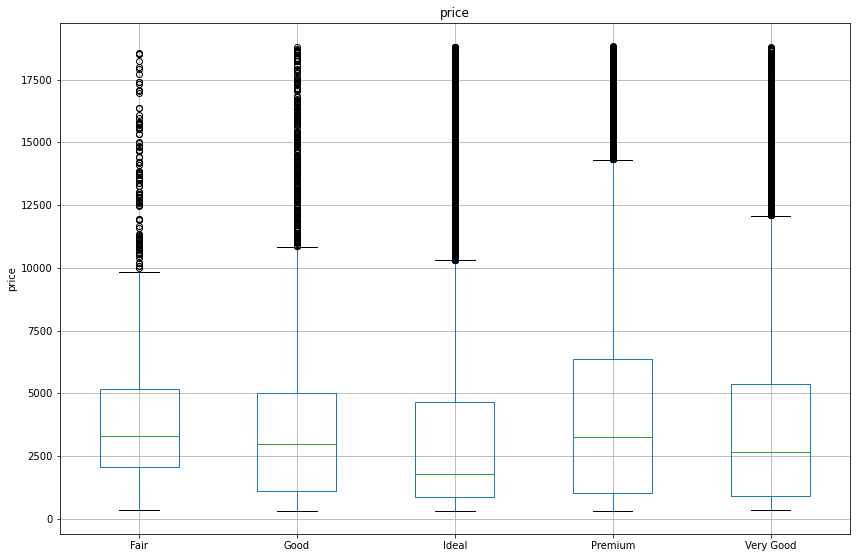

In [41]:
ax = df_final.boxplot(by='cut',
                           column='price',
                           figsize=(12, 8))
ax.set_xlabel('')
ax.set_ylabel('price')
plt.suptitle('')
plt.tight_layout()

<AxesSubplot:ylabel='cut'>

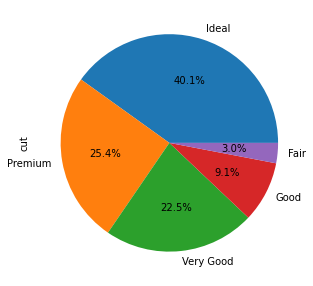

In [60]:
df_cut = df_final.cut.value_counts()
df_cut.plot.pie(autopct='%1.1f%%',figsize=(5, 5))

# Conclusiones

Variable que más influte en el precio es el Carat
Son features independientes, no hay diamante tipo. 
Corte premium es el más caro, más vendido ideal.
El precio del diamente depende de su Volumen, y de sus carat principalmente, a mayor volumen, mayor carat, mayor precio.
Ciudades donde más se venden: Surat, Antwerp, Kimberly
Color más vendido G, más caro J.
Clairty más vendida SI1, más cara SI2. No son los Clarity más trabajada. 